In [1]:
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from metrics_toolbox import EvaluatorBuilder
import numpy as np

# 1. Binary label

{'values': {'roc_auc_target_1_mean': 0.9984200470311582,
  'roc_auc_target_1_std': 0.0015799529688418357},
 'steps': {'roc_auc_target_1_steps': [0.9968400940623163, 1.0]},
 'figures': {'roc_auc_curves': <Figure size 600x480 with 1 Axes>}}

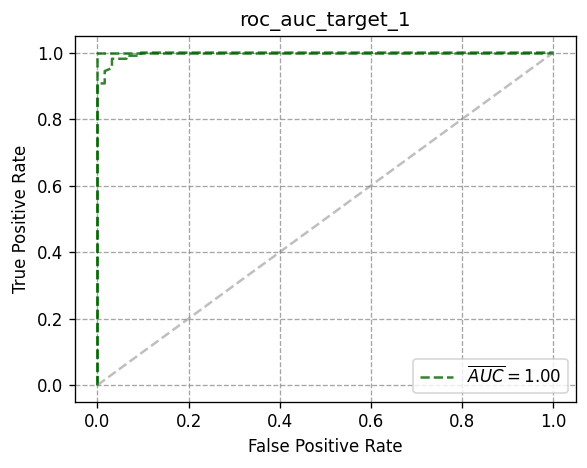

In [2]:
# 1. Load dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train a model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 3. Build evaluator with multiple metrics
evaluator = (
    EvaluatorBuilder()
    .add_metric("roc_auc_target", target_name=1, reducers=["mean", "std"])
).build()

# 4. Evaluate model directly
evaluator.add_model_evaluation(model, X_test, y_test)

# 5. Add another evaluation on training set for comparison
evaluator.add_model_evaluation(model, X_train, y_train)

# 6. Get results
result = evaluator.get_results()
display(result)

# 7. View figures
result['figures']['roc_auc_curves']

# 1. Multiclass label

{'values': {'roc_auc_micro_mean': 0.9927849945898046,
  'roc_auc_micro_std': 0.005259676224182111,
  'roc_auc_macro_mean': 0.985151575803988,
  'roc_auc_target_0_latest': 1.0,
  'roc_auc_target_1_latest': 0.9714285714285715,
  'roc_auc_target_2_latest': 0.9732142857142857},
 'steps': {'roc_auc_micro_steps': [1.0, 0.987610946745562, 0.9907440370238518],
  'roc_auc_macro_steps': [1.0, 0.9739071083643452, 0.981547619047619],
  'roc_auc_target_0_steps': [1.0, 1.0, 1.0],
  'roc_auc_target_1_steps': [1.0, 0.9625199362041468, 0.9714285714285715],
  'roc_auc_target_2_steps': [1.0, 0.9592013888888888, 0.9732142857142857]},
 'figures': {'roc_auc_curves': <Figure size 1800x960 with 6 Axes>}}

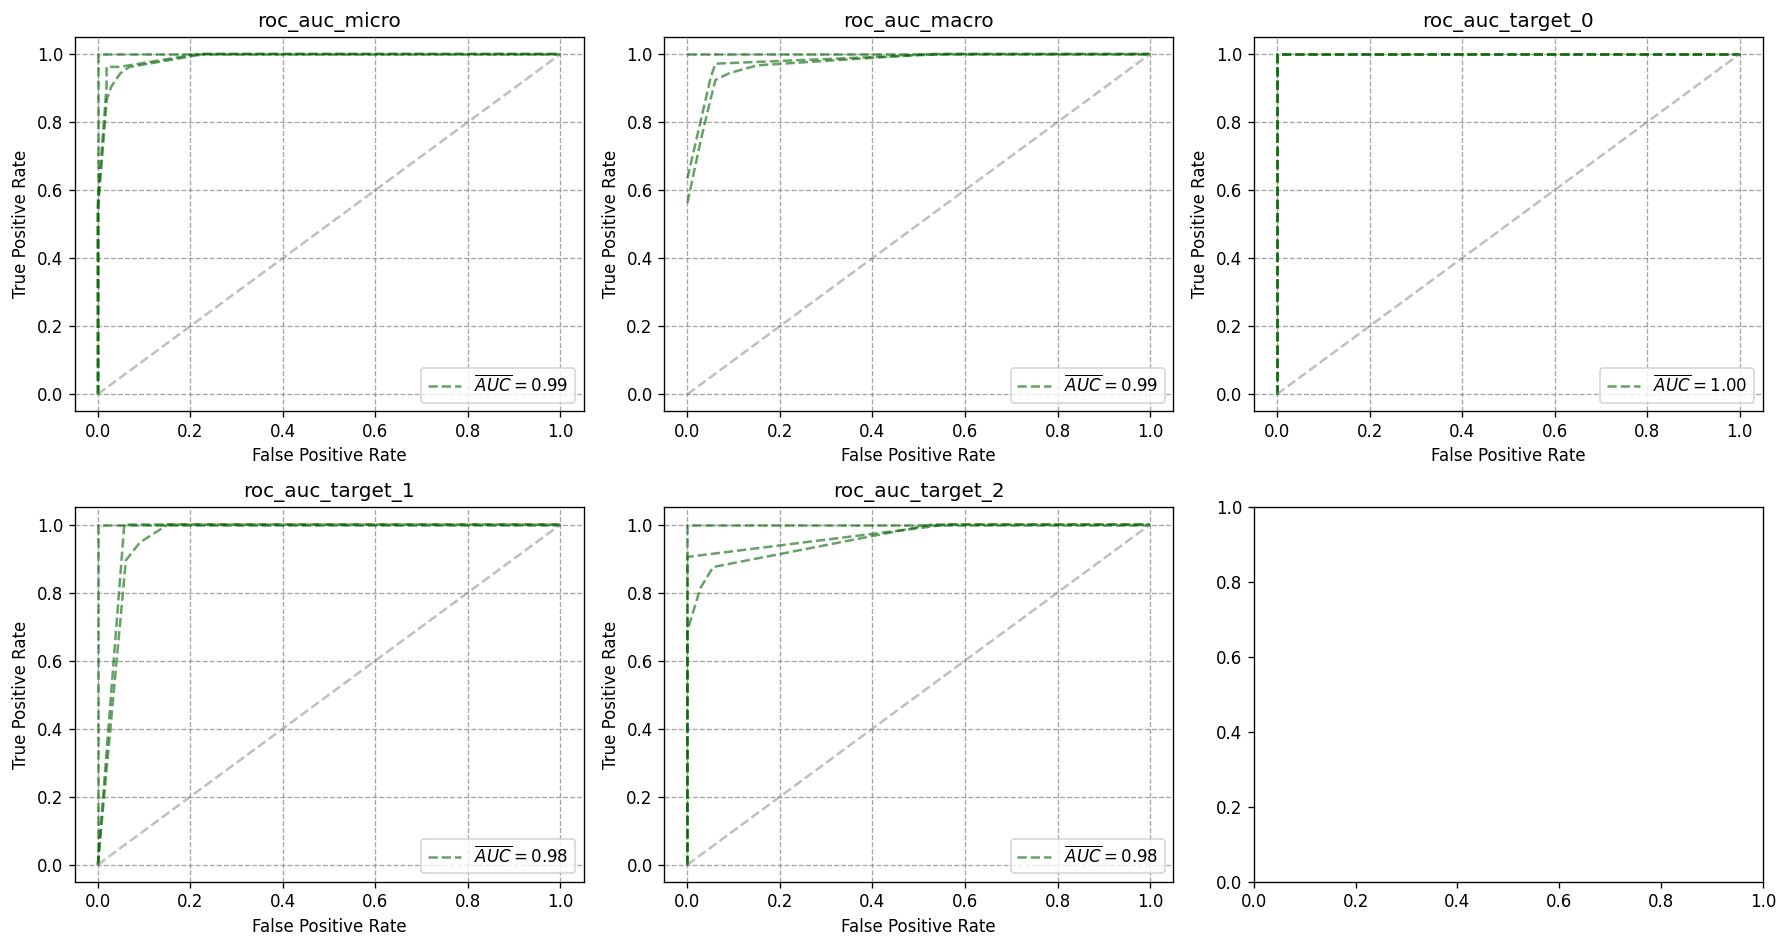

In [3]:
# 1. Load multiclass dataset (3 classes: setosa, versicolor, virginica)
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Train a model
model = RandomForestClassifier(n_estimators=2, random_state=42, max_depth=2)
model.fit(X_train, y_train)

# 3. Build evaluator with multiclass metrics
evaluator = (
    EvaluatorBuilder()
    .add_metric("roc_auc_micro", reducers=["mean", "std"])              # Micro-averaged
    .add_metric("roc_auc_macro", reducers=["mean"])                     # Macro-averaged
    .add_metric("roc_auc_target", target_name=0, reducers=["latest"])   # Setosa
    .add_metric("roc_auc_target", target_name=1, reducers=["latest"])   # Versicolor
    .add_metric("roc_auc_target", target_name=2, reducers=["latest"])   # Virginica
).build()

# 4. Add model evaluations
evaluator.add_model_evaluation(model, X_test, y_test)
evaluator.add_model_evaluation(model, X_train[:X_train.shape[0]//2], y_train[:y_train.shape[0]//2])
evaluator.add_model_evaluation(model, X_train[X_train.shape[0]//2:], y_train[y_train.shape[0]//2:])

# 5. Get results
result = evaluator.get_results()
display(result)

# 6. View ROC curves for all classes
result['figures']['roc_auc_curves']